# December 6th, 2022 In-Class Review

- Review material in order learned
- Summarize most of what was learned in each section then focus on material that is relatively important or potentially confusing
- Not necessarily reflective of what will be covered on the final exam
- There may be errors. Email me know if you see any!
- Borrowed lots of code and some words from QuantEcon Lecture Notes. Attempted to cite heavily-borrowed text using $\dagger$.

In [119]:
# Packages used
import random as random
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.sparse as spr
import scipy.optimize as opt
import pandas as pd
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
import inspect
import networkx as nx
random.seed(10)

# Python Fundamentals


## Basics - Summary
In this chapter, we learned
- Variable Assignment
- Functions
- What Objects Are
- Data types
- Modules
- Good Coding Habits
- Common operations and methods for three groups of data types:
    - Numbers
    - Strings
    - Booleans

### Function Calls vs. Function Objects
Functions such as `print` can be called and are themselves objects we can reference. This sometimes caused confusion. Here I make a toy function that takes the function `print` as an input to print the second input, `p_str`, twice

In [120]:
def doubleprint(print_func, p_str):
    print_func(p_str)
    print_func(p_str)

In [121]:
doubleprint(print, "Hello World")

Hello World
Hello World


Since print does not return a function (in fact it returns nothing), we cannot do either of the following. 

In [122]:
try:
    doubleprint(print(), "Hello World") # wrong
    doubleprint(print("Hello World"), "Hello World") # wrong
except:
    print("first argument needs to be a function")


first argument needs to be a function


We can, however, use function calls as an input ot another function, if the function were calling outputs a variable of the right type. 

In [123]:
def addtwo(num):
    return 2 + num

In [124]:
addtwo(random.randint(0,4)) # note I am calling randint to be an input of addtwo within the addtwo function call

6

### Function Help
Use `?` to get information about function such as its its arguments, a description of what it does, etc. Feature is more useful when function creator has provided more detailed information. 

In [125]:
# Notice how much information is provided
print?

In [126]:
# Notice how little information is provided because I didn't specify anything when defining doubleprint
doubleprint?

### Methods and Data Names
Objects of certain types will have different data names and methods associated with them. Methods are functions that operate on a certain class of objects.

In [127]:
a = np.ones((3)) # 3x1 array
a.shape # shape is a data name associated with all numpy arrays

(3,)

Below we have a method (sum) associated with an a object of a certain type (the numpy.ndarray) that is called on that object using dot notation

In [128]:
a.sum # Uncalled method
a.sum() # Called Method

3.0

In [129]:
asum = a.sum # like a function, we can assign this method to a variable
asum() # then call it

3.0

In [130]:
b = np.array(["hi"])
try:
    b.sum()
except:
    print(type(b) == type(a))
    print(a.dtype == b.dtype)
    print("methods will not always work on arrays of the same type if their contents differ")
    

True
False
methods will not always work on arrays of the same type if their contents differ


### Operators and Types
Operators, like functions, also care about types. 

In [131]:
print(3 + 3) 
print("hi" + "hi") # the '+' operator works on strings and numbers

6
hihi


In [132]:
3 ** 3
try:
    "hi" ** "hi"
except:
    print("the power operator, however, does not work on strings.")

the power operator, however, does not work on strings.


### Boolean Variables
Booleans are incredibly important as they allow for code to do different things when different conditions are met. We use them in
 - If/else statements
 - While loops
 - Selection of elements in arrays that meet certain conditions
 
It is important to understand boolean logic.

In [133]:
print("True and False is:", True and False)
print("True or False is:", True or False)

# Parentheses can matter
print((True or False and False))
print((True or False) and False)

True and False is: False
True or False is: True
True
False


Logical operators, much like arithmetic operators, have a corresponding order of operations 
1. Not
2. And
3. Or


## Collections -- Summary
In this chapter, we learned:
   - Ordered Collections (lists, tuples, and associated functions/methods)
   - Associative collections (dictionaries)
   - Sets
    


### Lists vs. Tuples
Both lists and tuples are ordered collections, but they have two key differences:
 - Tuples declared via parentheses `(1, 2, 3)`. Lists declared via brackets `[1,2,3]`
 - Tuples are immutable. Lists can be altered.

Whether or not you want to change elements of the collection after declaration should be the main determinant when choosing which one to use.

### Collection Nesting
Below, we nested a list within a list, a tuple within a tuple, and a dictionary withing a dictionary. You can also nest one type of collection within another.

In [134]:
nest_list = [[1,2], ["Hello", "World"]]  # list of lists
nest_tuple = ((1,2), ("Hello", "World")) # Tuple of tuples
nest_dict = {"numbers": {"one": 1,       # Dictionary of Dictionaries
                         "two": 2},
             "strings": {"H": "Hello",
                         "W": "World"}
            }

list_of_dict = [{"one": 1,               # List of Dictionaries
                "two": 2},
               {"H": "Hello",
                "W": "World"}]


try: # sets of sets
    set_of_sets = {{"ten", 4.3}, {print}}  
except:
    print("Set of sets doesn't work without making the inner sets immutable. Outer sets are still mutable.")
    
set_of_sets = {frozenset(("ten", 4.3)), frozenset("ten")}

Set of sets doesn't work without making the inner sets immutable. Outer sets are still mutable.


Accessing elements in nested collections can be done by using sequences of bracket indices

In [135]:
nest_list[0][0] + nest_tuple[0][1]  # Accessing elements and adding them

3

### Sets Quiz
What will the output of the below be? Why?

In [136]:
print({"Hello", "Hello", "World", "World"})

{'Hello', 'World'}


## Control Flow -- Summary
In this chapter, we learned:
- How to use `if/elif/else` conditionals to selectively execute  blocks of code
- What an iterable is
- `for` and `while` loops and loop-specific keywords
- Used all of this knowledge to calculate Net Present Value of assets

### Control Flow Logic
To make sure your code reflects the logic of the process you're implementing, it is important that 

- Your `if` statements and `while` loops use sound Boolean logic 
- You're initializing variables correctly before beginning the loop
- Your within-loop logic, such as manual iteration of a variable or logging of a variable at a given iteration, is correct given your needs. 




### Iterables
Iterables are any object capable of producing one item at a time.
- Lists
- Tuples
- Dictionaries,
- Range, Zip, and Enumerate objects

### For Loops vs. While Loops
 - For loops allow you to iterate over an iterable and execute the code in the indented block for each element in that iterable 
 - While loops repeat the  code in the indented block until some condition is met and generally require you to manually iterate variables within that chunk
 - For loops are generally better when you know you need to iterate through each element in an iterable once (calculating net present value over a fixed time period)
 - While loops are generally better when you do not know at what iteration the code should end (figuring out how many months an employee must stay to justify employer-sponsored Python training using the present value framework) 

## Fibonacci Example
The Fibonacci Sequence is given as follows:
$$
X_0 = 0
$$
$$
X_1 = 1
$$
$$
\hspace{3.66cm}X_t = X_{t-1} + X_{t-2} \text{ for } t \geq 2
$$

Below we have two functions, one that calculates $X_t$ for a given $t$ and one that returns the smallest $t$ such that $X_t \geq n$. Given what we discussed, it makes sense to use a for loop for the former and a while loop for the latter.

In [137]:
# Calculates Value of Fibonacci sequence
def calc_fibo(t):
    if t == 0:
        return 0
    if t == 1:
        return 1
    xt = 1
    xtm1 = 0
    for i in range(t-1):
        nv = xt+xtm1
        xtm1 = xt
        xt = nv
    return xt

# Tells us the first iteration (t) where the Fibonacci sequence is larger than or equal to a given number
def fibo_first(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    xt = 1
    xtm1 = 0
    t = 1
    while xt < n:
        nv = xt+xtm1
        xtm1 = xt
        xt = nv
        t += 1 
    return t

In [138]:
# call functions to test
print(calc_fibo(32))
print(fibo_first(143))  

2178309
12


## Application Net Present Value
We've done a lot of this, but many struggled with the following question from Problem Set 3:


If you already knew that your discount rate would change annually according to the
table below, at what price would you value the quarterly asset (from the main text) in January 2022?

*Hint*: There are various ways to do this… One way might include a zipped loop for years and a
second loop for months.

*More Challenging*: Can you create the list of interest rates without calculating each year individually?

|Year|Discount Rate|
|:------------------------------------------------:|:------------------------------------------------:|
|2022|0.005|
|2023|0.0047|
|2024|0.0044|
|2025|0.0041|
|2026|0.0038|
|2027|0.0035|
|2028|0.0032|
|2029|0.0029|
|2030|0.0026|
|2031|0.0023|


Here is my solution to the problem. Some things to note:
- I loop through quarters and use the year variable to keep track of which interest rate I should be using. 
- My discount factor `df` is initialized to 1 because I use it to keep a running value of my discount factor which allows me to easily account for the fact that different years have different discount factors.
- Notice how important it is that I increment year at the end of the code and not at the beginning. What are the minimal changes I would have to make in order to move my year incrementation logic to the beginning of the indented block?

In [139]:
df = 1
pdv = 0
rs = [round(.005 - .0003 * float(x),16) for x in range(10)]
year = 0
for t in range(1,41):
    r = rs[year]
    df = df * ((1/(1+r)) ** 3)
    pdv += 500 * df
    if (t % 4) == 0:
        year +=1
print(pdv)


15643.638512873144


### List Comprehensions
When you need to create a list of values that are generated from a simple algorithmic procedure, try using list comprehensions instead of loops, especially if the size of the vector will be large.

In [140]:
[math.sin(x) for x in np.linspace(-2*math.pi, 2* math.pi, num = 1000 )];

## Functions -- Summary
In this chapter, we learned:
- Economic production functions
- How to define our own functions
- How to write function documentation
- When and why to use functions
- Scoping



### Why use functions?
- Reusable
- Superior to copy and pasting because 
    - If you want to make a change, you only need to make it once
    - Results in less cluttered code
- Can act as a descriptor of what a given chunk of code does (e.g. `doubleprint` and `addtwo`)
- Easier to collaborate

### Scope 
Functions have their own variable scope, so variable declared within the function are not accesible outside of the function.

In [141]:
def ab_print(a,b):
    apb = a + b
    print(apb)

In [142]:
ab_print("Hello ", "World")

Hello World


In [143]:
try:
    print(apb)
except:
    print("Cannot find the variable apb because it was defined with in ab_print")

Cannot find the variable apb because it was defined with in ab_print


Global Variables, however, are accesible to the function if that variable name is not declared within the function inputs.

In [144]:
a = "Goodbye Cruel "
def ab_print_2(b):
    apb = a + b
    print(apb)
def ab_print(a,b):
    apb = a + b
    print(apb)


In [145]:
ab_print_2("World")
ab_print("Hello ", "World")
print(a)

Goodbye Cruel World
Hello World
Goodbye Cruel 


- `ab_print_2` used `a = "Goodbye Cruel "` because `a` was not declared within `ab_print_2`
-  `ab_print` used `a = "Hello "` because `a` was declared within `ab_print`'s arguments as "Hello "
- Note how the global `a` remains unchanged after calling `ab_print`

# Scientific Computing

## Introduction to Numpy -- Summary
In this chapter, we learned:
- Basic information about Numpy Arrays
- Multi-dimensional array indexing
- Broadcasting for easy element-wise operations

### Why NumPy Arrays Instead of Lists?
Numpy arrays behave like lists but impose additional restrictions on how the data is organized. Allows us to use list-like objects to represent arrays such as vectors and matrices. 

### Array Properties and Methods
Arrays have many properties such as their length or shape and the type of data they house. Similarly, there are methods common to all arrays that house numbers.

In [146]:
x = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(x.shape)
print(x.dtype)

(2, 2, 3)
int32


In [147]:
print(x.sum()) # Some methods use dot notation
print(x.std())

np.linalg.eig(np.eye(2)) # others are called like standard functions

78
3.452052529534663


(array([1., 1.]),
 array([[1., 0.],
        [0., 1.]]))

### NumPy Vectorize
Can vectorize function that normally take scalars as inputs. Here we vectorize the `addtwo` function from earlier (which normally takes a scalar input `num` and returns `num` plus two). After vectorizing with `np.vectorize` and assigning the output (which is a function) to `addtwo_vec`, we can now call `addtwo_vec` which takes a vector as an input and returns a vector of outputs.

In [148]:
addtwo_vec = np.vectorize(addtwo)
addtwo_vec(np.array([3,4]))

array([5, 6])

## Plotting -- Summary
- Understand basics of Matplotlib


### Figure vs. Axis
- The figure is the whole image including the frame
- An axis refers to a single coordinate plane (in the case of 2d plots)

### Basic Plotting
Here we will go over some basic plotting that illustrates some useful functionality. This is just a toy example that I think illustrates the basics of what you should be able to do without referencing something. What advice in the intermediate plotting chapter are we not following below? 

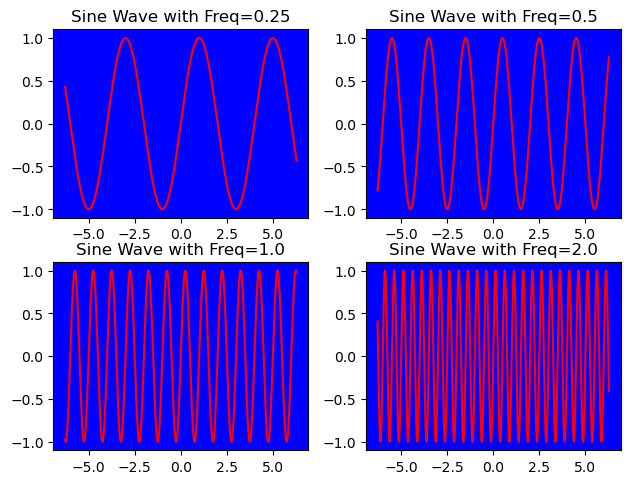

In [149]:
fig, axes = plt.subplots(2, 2) # This creates a figure with 4 axes arranged in a 2x2 grid
fig.tight_layout() # Make it so axis tick marks don't obstruct eachother
x_val = np.linspace(-2 * math.pi, 2 * math.pi, num = 1000) # create set of x values
freq = np.array([.25, .5, 1, 2]) # various frequencies
vec_sin = np.vectorize(math.sin) # vectorize sin function to apply to vectors


for i, ax in enumerate(axes.flat):
    ax.plot(x_val, vec_sin(freq[i] * 2 * math.pi* x_val), color = "red") # plot red line on each individual axis
    ax.set_facecolor("blue") # set axis facecolor to blue
    ax.set_title("Sine Wave with Freq=" + str(freq[i])) # set axis title

## Applied Linear Algebra -- Summary
In this chapter, we learned:
- Linear Algebra concepts
- Applied concepts to employment dynamics and pricing portfolios
- Use NumPy to perform linear algebra operations


### Arrays as Vectors or Points in Spaces
If `x` is an array with $n$ elements, we can view it as a point or an vector from the origin in $\mathbb{R}^n$. 

In [150]:
x = [1,5]
y = [5,1]

Text(0.5, 0.98, 'Vectors in R2')

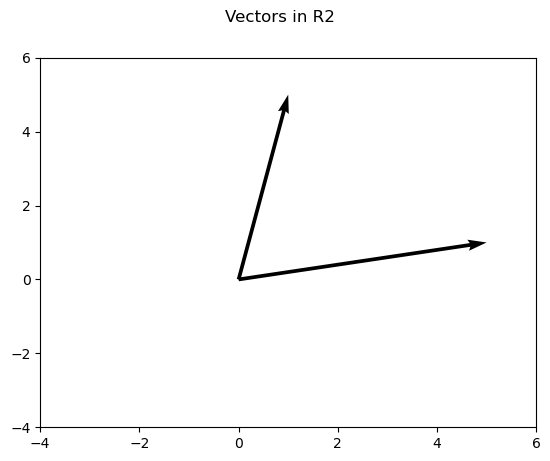

In [151]:

plt.quiver([0, 0], [0,0], [x[0], y[0]], [x[1], y[1]], angles='xy', scale_units='xy', scale=1)
plt.xlim(-4,6)
plt.ylim(-4,6)
plt.suptitle("Vectors in R2")

### The @ operator
Much like operators (such as `+`) do different things when applied to different data types, `@` works differently for 1d and 2d arrays

In [152]:
print(np.array([1, 2, 3]) @ np.array([2, 3, 6]))
print(1 * 2 + 2 * 3 + 3 * 6) # @ gives us dot product

26
26


In [153]:
print(np.array([[1, 2], [3, 4]]) @ np.array([[2, 2], [2, 1]]))
np.array([[1 * 2 + 2 * 2, 1 * 2 + 2 * 1],
          [3 * 2 + 4 * 2, 3 * 2 + 4 * 1]] ) # @ gives us matrix multiplication

[[ 6  4]
 [14 10]]


array([[ 6,  4],
       [14, 10]])

### Application Unemployment
We can model the dynamics of unemployment and employment using a transition matrix where the elements are functions of the job finding and job loss rate. If $\alpha$ is the rate of job loss and $\phi$ is the job finding rate, then our transition matrix can be expressed as 
$$
A = \left[\begin{array}{cc} 1 - \alpha & \alpha \\ \phi & 1- \phi
\end{array}\right]
$$
If we define $$x_t=\left[\begin{array}{c} E_t \\ U_t
\end{array}\right]$$ where $E_t$ and $U_t$ are respectively the number of employed and unemployed people at time $t$.

Using these two objects, we have
$$x_{t+1} = A'x_t$$

**Hint**:If you forget if $A$ should be transposed or not given how you defined $A$ remember that $E_t$ should not be multiplied by a function of $\phi$ because employed people aren't searching for jobs in this model. Analgously, $U_t$ should not be multiplied by a function of $\alpha$ because people cannot lose jobs they don't have. 

Below, I illustrate some of the code from QuantEcon. Note that when $X_0$ starts far away from the steady state, the initial change in employed and unemployed people is much higher than it is when $X_0$ starts closer to the steady state.

## Unemployment Helper Functions

In [154]:
def simulate(x0, A, T = 20):
    nX = x0.shape[0]
    out = np.zeros((T, nX))
    out[0, :] = x0
    
    for t in range(1, T):
        out[t, :] = A.T @ out[t-1, :]

    return out

def plot_simulation(x0, A, T = 20, last_X = False):
    X = simulate(x0, A, T)
    fig, ax = plt.subplots()
    ax.plot(X[:, 0])
    ax.plot(X[:, 1])
    ax.set_xlabel("t")
    ax.legend(["Employed", "Unemployed"])
    if last_X:
        return ax, X[T-1, :]
    else:
        return ax

In [155]:
α = .04
ϕ = .15
x0 = np.array([650000, 150000]) # close to the steady state
A = np.array([[1 - α, α], 
              [ϕ, 1 - ϕ]])


<AxesSubplot:xlabel='t'>

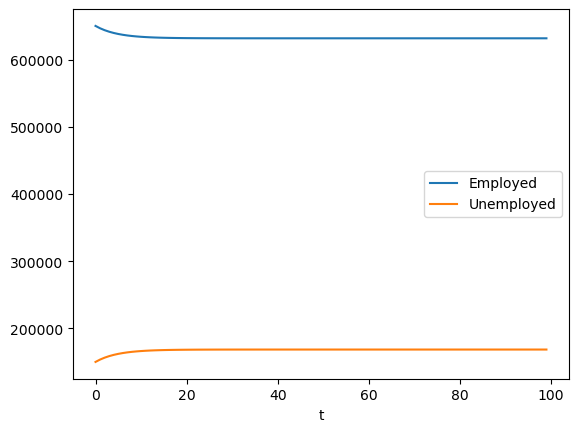

In [156]:
X = plot_simulation(x0, A, T = 100)
X

<AxesSubplot:xlabel='t'>

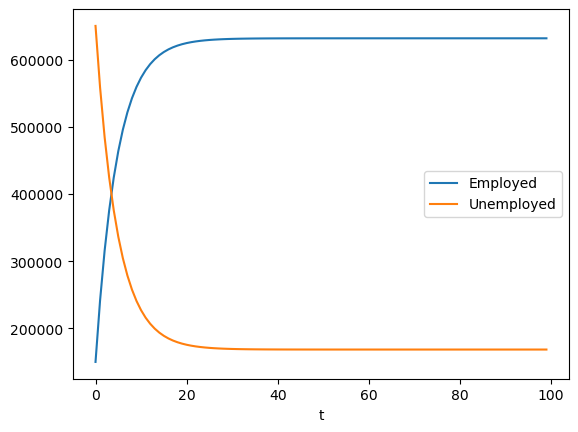

In [157]:
# Different X0 still converges
x0 = np.array([150000, 650000]) # far from the steady state
X = plot_simulation(x0, A, T= 100)
X

## Randomness -- Summary
In this chapter, we learned:
- basic probability
- random variable generation with numpy
- how to simulate and why it is useful
- Markov Chain fundamentals


### Continuous vs. Discrete Variables
- Simple rule of thumb -- Can the event space be counted? 
. 
- Discrete -- possible outcomes all have non-zero chance of happening
- Continuous -- generally, all single possible outcomes have a 0 probability of ocurring


### Generating Random Variables
We use numpty to generate uniform random variables.

In [158]:
rand_scalar = np.random.rand()
rand_vec = np.random.rand(5)
rand_mat = np.random.rand(2,2)

### Informal law of Large Numbers
Informally, the law of large numbers (LLN) tells us that as the number of samples (or simulations) tends to infinity, the probability of the sample average of random variables deviating from their true mean by more than a fixed, small value goes to 0.  


### Discrete Example
For example, let $X_i$ be the value of rolling a fair dice. The expected value of $X_i$ is
$$
\bar{X}_i = \sum_{x = 1}^{6}x P(X_i = x) = \frac{(1 + 2 + 3 + 4 + 5 + 6)}{6} = 3.5
$$

If we were to roll many, many dice, the LLN tells us that we would expect the sample average to be very close to 3.5 with high probability.

In [159]:
def roll_n_dice(n):
    return np.random.randint(1,7, n)   

num_samples = 10000
avg_rolls = [(roll_n_dice(x).mean()) for x in range(5, num_samples)]
single_trial = roll_n_dice(num_samples)
avg_rolls_s = [(single_trial[0:x].mean()) for x in range(5, num_samples)]
    

Text(0.5, 1.0, 'Single Draw')

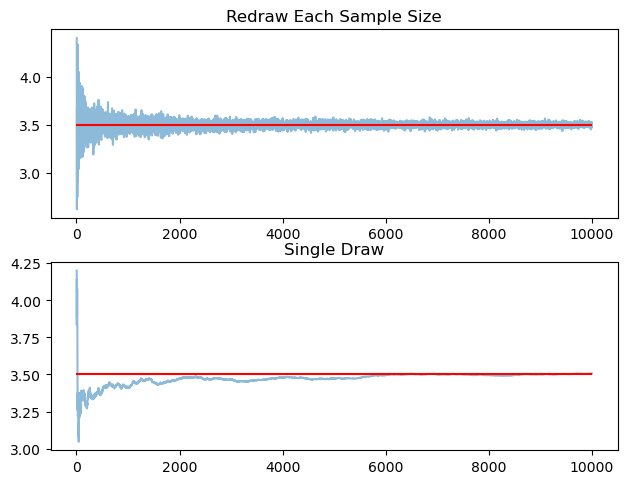

In [160]:
fig, ax = plt.subplots(2)
fig.tight_layout()
ax[0].plot(range(5,num_samples),avg_rolls, alpha = .5)
ax[0].hlines(y=3.5, xmin = 0, xmax = 10000, color = "red")
ax[0].set_title("Redraw Each Sample Size")
ax[1].plot(range(5,num_samples),avg_rolls_s, alpha = .5)
ax[1].hlines(y=3.5, xmin = 0, xmax = 10000, color = "red")
ax[1].set_title("Single Draw")

### Continuous Example
The LLN also guarantees that we can estimate distributions more accurately as the number of samples (or simulations) goes up. Now, let $X_i$ be the height of a randomly selected sample of men in the U.S. It has been shown that height follows the following distribution
$$
X_i \sim\text{Normal}(70 , 3)
$$
where the mean and standard deviation are in inches. 

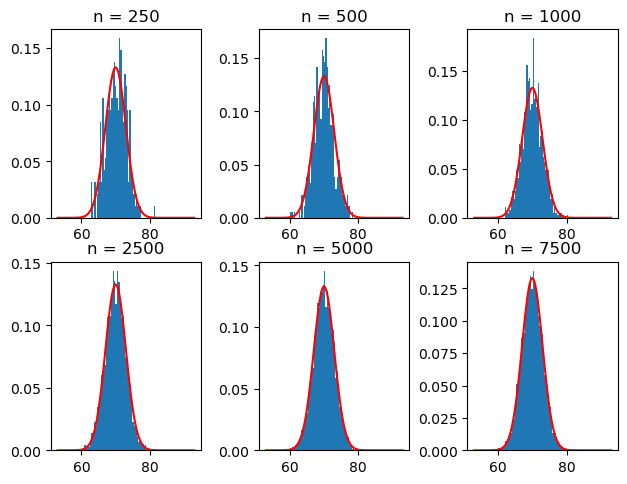

In [161]:
x = np.linspace(73-20, 73+20, 100)
ns = [250, 500, 1000, 2500, 5000, 7500]
height_dist = st.norm(70, 3)
height_samples = [np.random.normal(70, 3, x) for x in ns]


pdf_x = height_dist.pdf(x)
fig, axs = plt.subplots(2,3)
fig.tight_layout()

for i,ax in enumerate(axs.flat):
    ax.set_title("n = {ss}".format(ss = ns[i]))
    pdf_x_i = pdf_x 
    ax.plot(x, pdf_x_i, color = 'r')
    ax.hist(height_samples[i], bins = 50, density = True)

Notice how our histogram fits the true density curve more accurately as the number of samples increases.

### Optimization -- Summary
In this chapter, we learned:
- How to optimize analytically using derivatives
- How numerically optimize
- Algorithmic Heuristics 


### Derivatives and Optima
Given a univariate function $f(x)$ for $x \in [a,b]$, local minimums and maximums can be achieved at the boudaries (when $x=a$ or $x = b$) or when: $$
\frac{\partial f(x)}{\partial x} = 0
$$  

As an example, we define
$$
f(x) = 6e^{-x} + 3 x ^ 2 \text{ for } x \in [-2,2]
$$

Set the derivative equal t 0
$$
\frac{\partial f(x)}{\partial x} = 0 \\ \implies x = e^{-x} 
$$

Can't solve this analytically. We can graphically observe what it should be below.

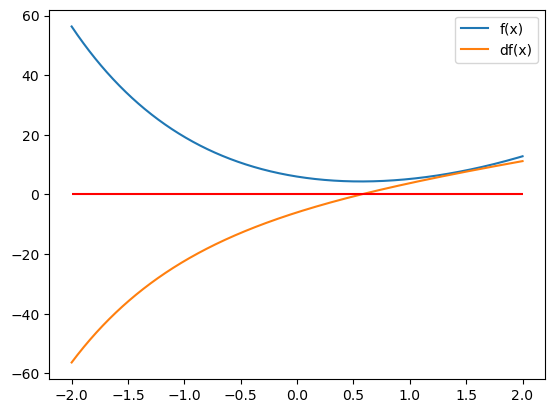

In [162]:
X = np.linspace(-2, 2, num = 1000)
def f(x):
    return 6*math.exp( -x) + 3 * x ** 2

def df(x):
    return  -6*math.exp(-x)  + 6 * x 

f_val = [f(x) for x in X]
df_val = [df(x) for x in X]
fig, axs = plt.subplots()
axs.plot(X, f_val, label = "f(x)")
axs.plot(X, df_val, label = "df(x)")
axs.hlines(y = 0, xmin = -2, xmax = 2, color ='r')
axs.legend()


Graphically, it looks like the minimum is slightly more than .5. Using numerical otpimization, we can get a more precise approximation. 

In [163]:
min_out = opt.minimize_scalar(f, [-2, 2])
print("The minimum is: \n", min_out.fun, "and it happens at x =", min_out.x)

The minimum is: 
 4.367814278029212 and it happens at x = 0.5671432936663143


In [164]:
print(f(min_out.x)) # Can check that this is the right value
print(df(min_out.x)) # Can check that derivative is clost to 0

4.367814278029212
3.0620699309480415e-08


We also want to find the maximum. In this case,it's obvious that the maximum is attained at the boundary where $x = -2$. We will confirm this `minimize_scalar`. Since we want to find the maximum, we must consider the negative of $f(x)$. 

In [165]:
def neg_f(x):
    return -f(x)
max_out = opt.minimize_scalar(neg_f, bounds = [-2, 2], method = "bounded")
print("The maximum is: \n", max_out.fun, "and it happens at x =", max_out.x)

The maximum is: 
 -56.33401950678871 and it happens at x = -1.999994371326411


Remember that if you're having convergence issues, try implementing the bounded method as above.

### Multivariable Optimization When Constraint Binds
Recall the homework problem regarding optimal raito of bananas to apples. 
- Issue: Using minimize scalar, which only optimizes along one input variable, to maximize a function of two variables.

- Solution: In the Cobb Douglas Setting utility is maximized when the budget constraint is binding, so we can replace one variable (number of apples) to be a function of another variable (number of bananas) and exogenous parameters (budget and price of apples).

# Pandas

## Pandas -- Summary
In this set of chapters, we learned:
- The core pandas objects (Series and DataFrame)
- Basic visualization with Pandas objects
- `datetime`
- built-in aggregation functions
- `apply` and `applymap`
- Indexing of dataframes
- Reading and writing tabular data
- Data cleaning 
- How to reshape data via `melt`, `stack`, `unstack`, and `pivot'
- How to combine data using `concat`, `merge`, and `join`
- How to use `groupby` to compute within-group aggregate statistics
- Useful functions that deal with time series
- Intermediate plotting

### Series and DataFrames
A **series** is a single column of data with row labels for each observation. These row labels allows us to index each element of the series. We can customize these indices:

In [166]:
values = [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
years = list(range(1995, 2017, 2))

unemp = pd.Series(data=values, index=years, name="Unemployment")

In [167]:
unemp

1995    5.6
1997    5.3
1999    4.3
2001    4.2
2003    5.8
2005    5.3
2007    4.6
2009    7.8
2011    9.1
2013    8.0
2015    5.7
Name: Unemployment, dtype: float64

A **DataFrame** is used to store one or more columns of data. Like a series, the a DataFrame has row indices, but it also has column indices.

In [168]:
data = {
    "NorthEast": [5.9,  5.6,  4.4,  3.8,  5.8,  4.9,  4.3,  7.1,  8.3,  7.9,  5.7],
    "MidWest": [4.5,  4.3,  3.6,  4. ,  5.7,  5.7,  4.9,  8.1,  8.7,  7.4,  5.1],
    "South": [5.3,  5.2,  4.2,  4. ,  5.7,  5.2,  4.3,  7.6,  9.1,  7.4,  5.5],
    "West": [6.6, 6., 5.2, 4.6, 6.5, 5.5, 4.5, 8.6, 10.7, 8.5, 6.1],
    "National": [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
}

unemp_region = pd.DataFrame(data, index=years)
unemp_region

,NorthEast,MidWest,South,West,National
1995,5.9,4.5,5.3,6.6,5.6
1997,5.6,4.3,5.2,6.0,5.3
1999,4.4,3.6,4.2,5.2,4.3
2001,3.8,4.0,4.0,4.6,4.2
2003,5.8,5.7,5.7,6.5,5.8
2005,4.9,5.7,5.2,5.5,5.3
2007,4.3,4.9,4.3,4.5,4.6
2009,7.1,8.1,7.6,8.6,7.8
2011,8.3,8.7,9.1,10.7,9.1
2013,7.9,7.4,7.4,8.5,8.0


In [169]:
print(type(unemp_region.loc[:,"NorthEast"])) # Selecting a single column or row from DataFrame results in a series 
print(type(unemp_region.loc[2011,:]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


### Apply vs. Applymap
`apply` and `applymap` both allows us to apply premade or custom functions to data, but how do they differ? 
`apply` is used to apply a function along an axis of the DataFrame.
Consider standardizing the unemployment data with the following function:$\dagger$

In [170]:
def standardize_data(x):
    """
    Changes the data in a Series to become mean 0 with standard deviation 1
    """
    mu = x.mean()
    std = x.std()

    return (x - mu)/std

In [171]:
a_std_unemp = unemp_region.apply(standardize_data)
print(a_std_unemp)


      NorthEast   MidWest     South      West  National
1995   0.074522 -0.663809 -0.294297 -0.009502 -0.230264
1997  -0.130414 -0.780639 -0.356552 -0.323057 -0.415598
1999  -0.950160 -1.189546 -0.979103 -0.741130 -1.033379
2001  -1.360033 -0.955885 -1.103613 -1.054685 -1.095157
2003   0.006210  0.037173 -0.045276 -0.061761 -0.106708
2005  -0.608599  0.037173 -0.356552 -0.584352 -0.415598
2007  -1.018472 -0.430148 -0.916848 -1.106944 -0.848044
2009   0.894269  1.439138  1.137570  1.035681  1.128854
2011   1.714015  1.789629  2.071397  2.133124  1.931969
2013   1.440766  1.030231  1.013060  0.983422  1.252410
2015  -0.062102 -0.313318 -0.169787 -0.270797 -0.168486


This standardized each column (the unemployment for each region acoss many years) by the column-specific mean and standard deviation. To apply a function by row, use the argument `axis=1`.

`applymap`, however, applies a function to every element individually. If we wanted to standardize unemployment from all regions across all years together using the function we already built, it will not work.

In [172]:
try:
    a_std_unemp = unemp_region.applymap(standardize_data)
except:
    print("ApplyMap fails because it is inputting a scalar value into the function, but the function expects a collection of numbers")

ApplyMap fails because it is inputting a scalar value into the function, but the function expects a collection of numbers


If we want, however, to convert our unemployment numbers to log unemployment, `applymap` is perfect

In [173]:
unemp_region.applymap(math.log)

,NorthEast,MidWest,South,West,National
1995,1.774952,1.504077,1.667707,1.887070,1.722767
1997,1.722767,1.458615,1.648659,1.791759,1.667707
1999,1.481605,1.280934,1.435085,1.648659,1.458615
2001,1.335001,1.386294,1.386294,1.526056,1.435085
2003,1.757858,1.740466,1.740466,1.871802,1.757858
2005,1.589235,1.740466,1.648659,1.704748,1.667707
2007,1.458615,1.589235,1.458615,1.504077,1.526056
2009,1.960095,2.091864,2.028148,2.151762,2.054124
2011,2.116256,2.163323,2.208274,2.370244,2.208274
2013,2.066863,2.001480,2.001480,2.140066,2.079442


### Indexing Example
How Pandas treats indices is important to understand, so we will review the example from the QuantEcon lectures. In the following data, rows are indexed by numbers and columns are indexed by strings of the variable name, but rows can also be indexed using strings and columns can be indexed by numbers. 


In [174]:
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
df = pd.read_csv(url)

df_small = df.head(5)
df_small

,country,year,GovExpend,Consumption,Exports,Imports,GDP
0,Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164
1,Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016
2,Canada,2015,0.358303,1.035208,0.568859,0.575793,1.794270
3,Canada,2014,0.353485,1.011988,0.550323,0.572344,1.782252
4,Canada,2013,0.351541,0.986400,0.518040,0.558636,1.732714


Here we select only some rows

In [175]:
df_tiny = df.iloc[[3, 2, 4], :] # notice we not only selected a subset of df_small, but we also changed the order
df_tiny

,country,year,GovExpend,Consumption,Exports,Imports,GDP
3,Canada,2014,0.353485,1.011988,0.550323,0.572344,1.782252
2,Canada,2015,0.358303,1.035208,0.568859,0.575793,1.794270
4,Canada,2013,0.351541,0.986400,0.518040,0.558636,1.732714


Notice how the indexing remained the same even though the order of the rows changed. 

Now, we select only some columns.

In [176]:
im_ex = df_small[["Imports", "Exports"]]
im_ex

,Imports,Exports
0,0.600031,0.582831
1,0.575775,0.576394
2,0.575793,0.568859
3,0.572344,0.550323
4,0.558636,0.518040


In [177]:
im_ex + df_tiny # what does adding these two dataframes do?

,Consumption,Exports,GDP,GovExpend,Imports,country,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.137718,NaN,NaN,1.151585,NaN,NaN
3,NaN,1.100646,NaN,NaN,1.144688,NaN,NaN
4,NaN,1.036081,NaN,NaN,1.117272,NaN,NaN


**Importance:** Even though our data got reordered, and we lost some columns, our element-wise addition is still doing what we want because the indexing is consistent across all objects made from the original DataFrame. The NaNs mean one or more of the dataframes was missing those indices.

### Reading and Writing Data
A good way of handling data, so that you and others can easily replicate results, is to have a file dedicated to cleaning the raw data without ever actually editing the original raw data.
1. Load Raw Data into Python as Pandas DataFrame
2. Use Pandas operations to clean and aggregate data as needed
3. Save cleaned data as a **new file** 
4. Create a separate Python script for analysis that uses the cleaned data file.

Doing this obviously requires being able to load and save data. Usually, you will be loading data directly into a DataFrame object and saving it directly from a DataFrame object.

In [178]:
df_tiny.to_csv("df_tiny.csv") # Save df tiny to working directory as a .csv
# You generally want to include file extension!

In [179]:
df_tiny_redux = pd.read_csv("df_tiny.csv") # Load it again
df_tiny_redux # note indices are different

,Unnamed: 0,country,year,GovExpend,Consumption,Exports,Imports,GDP
0,3,Canada,2014,0.353485,1.011988,0.550323,0.572344,1.782252
1,2,Canada,2015,0.358303,1.035208,0.568859,0.575793,1.794270
2,4,Canada,2013,0.351541,0.986400,0.518040,0.558636,1.732714


In [180]:
df_tiny_redux = pd.read_csv("df_tiny.csv", index_col = 0) # luckily we have an easy way to reload index column
df_tiny_redux

,country,year,GovExpend,Consumption,Exports,Imports,GDP
3,Canada,2014,0.353485,1.011988,0.550323,0.572344,1.782252
2,Canada,2015,0.358303,1.035208,0.568859,0.575793,1.794270
4,Canada,2013,0.351541,0.986400,0.518040,0.558636,1.732714


### Dropping Missing Data (extra material)
The most natural thing to do for missing data is to drop it when performing the final analysis as you cannot perform numeric options on `NA` or `NaN` This, however, comes with its own issues. Consider estimating the height of men in the US. Say we solicit 500 random people to volunteer their heights via email. 

In [181]:
full_height_sample = np.random.normal(70, 3, 500)
full_height_sample.mean() # Taking the mean gives us a very close number

70.14333932304477

Now imagine 200 people don't get back to us because they don't check those emails anymore (a reason presumably unrelated to their height)

In [182]:
email_issue_sample = np.random.choice(full_height_sample,  300, replace = False)
print(len(email_issue_sample))
email_issue_sample.mean()

300


70.08528216856847

Note how this is close to the true mean of $70$ which we would expect due the LLN and the fact that an individual sample is missing for reasons unrelated to that individual's height.

What if, however, the website for a store that makes clothes for tall people was recently hacked, and their customers had to change their emails. In this theoretical world, the probability of nonresponse is higher for tall people than it is for shorter people!

In [183]:
full_height_sample.sort()
weights = (1/(20*full_height_sample**10))/sum((1/(20*full_height_sample**10))) # weights such that taller people less likely to respond
email_issue_sample_h = np.random.choice(full_height_sample,  300, replace = False, p = weights)

email_issue_sample_h.mean()

69.52279542410729

If you run the above cell many times, you can see this now biases our estimate for the average height of US males below 70 because people who are taller are less likely to respond. When the missingness of a variable is correlated with the variable itself, estimates obtained after dropping missing data are generally not reliable measures of true population values (in this case, our estimate of the average height of US men is not a good measure of the average height of all US men). 

### Tidy Data
How you choose to reshape your should heavily depend on what your unit of analysis is. That is, you want your data to be tidy. As discussed in the QuanEcon lectures, tidy data entails that

"Each variable forms a column.\
Each observation forms a row.\
Each type of observational unit forms a table."

With this in mind, we again consider the following wdi data.

In [184]:
url = "https://datascience.quantecon.org/assets/data/wdi_data.csv"
df = pd.read_csv(url)
df.tail()

,country,year,GovExpend,Consumption,Exports,Imports,GDP
67,United States,2004,2.267999,9.311431,1.335978,2.108585,13.846058
68,United States,2003,2.233519,8.974708,1.218199,1.892825,13.339312
69,United States,2002,2.193188,8.698306,1.192180,1.804105,12.968263
70,United States,2001,2.112038,8.480461,1.213253,1.740797,12.746262
71,United States,2000,2.040500,8.272097,1.287739,1.790995,12.620268


If our unit of observation is a country-year, like it might be for a regression analysis, the data is in the tidy form. A country-year is a row, and all of the other variables constituite variables associated with that country-year (e.g. consumption in that country during that year). For instance, we could easily obtain gov't share of GDP expenditure in a given year as:

In [185]:
df["gov_share_GDP"] = df.loc[:,"GovExpend"] / df.loc[:,"GDP"]
df

,country,year,GovExpend,Consumption,Exports,Imports,GDP,gov_share_GDP
0,Canada,2017,0.372665,1.095475,0.582831,0.600031,1.868164,0.199482
1,Canada,2016,0.364899,1.058426,0.576394,0.575775,1.814016,0.201156
2,Canada,2015,0.358303,1.035208,0.568859,0.575793,1.794270,0.199693
3,Canada,2014,0.353485,1.011988,0.550323,0.572344,1.782252,0.198336
4,Canada,2013,0.351541,0.986400,0.518040,0.558636,1.732714,0.202885
...,...,...,...,...,...,...,...,...
67,United States,2004,2.267999,9.311431,1.335978,2.108585,13.846058,0.163801
68,United States,2003,2.233519,8.974708,1.218199,1.892825,13.339312,0.167439
69,United States,2002,2.193188,8.698306,1.192180,1.804105,12.968263,0.169120
70,United States,2001,2.112038,8.480461,1.213253,1.740797,12.746262,0.165699


If, however, we want to plot the evolution of GDP over the years for each country, it might be easier to make the observations to be years:

In [186]:
df_GDP = df.loc[:, ["country", "year", 'GDP']]
df_GDP

,country,year,GDP
0,Canada,2017,1.868164
1,Canada,2016,1.814016
2,Canada,2015,1.794270
3,Canada,2014,1.782252
4,Canada,2013,1.732714
...,...,...,...
67,United States,2004,13.846058
68,United States,2003,13.339312
69,United States,2002,12.968263
70,United States,2001,12.746262


In [187]:
df_wide = df_GDP.pivot(index = "year", columns = "country", values = "GDP")
df_wide  # We can see the data became less tall and wider 


country,Canada,Germany,United Kingdom,United States
year,,,,
2000,1.342805,3.123908,2.089877,12.620268
2001,1.366590,3.176873,2.149246,12.746262
2002,1.407725,3.176873,2.202971,12.968263
2003,1.433089,3.154320,2.276538,13.339312
2004,1.477317,3.191225,2.329987,13.846058
2005,1.524608,3.213777,2.403352,14.332500
2006,1.564608,3.332692,2.464591,14.741688
2007,1.596876,3.441356,2.527327,15.018268
2008,1.612862,3.478602,2.518585,14.997756


<AxesSubplot:xlabel='year'>

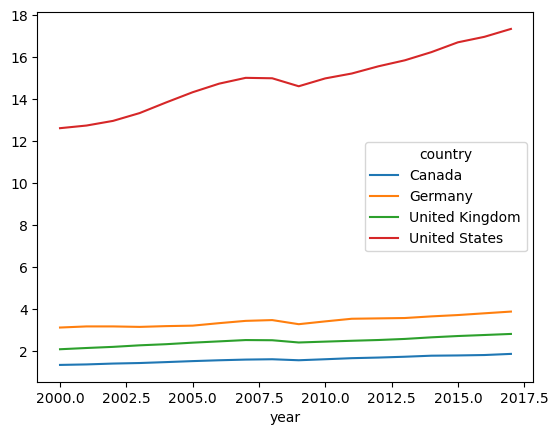

In [188]:
df_wide.plot()

### Merging Datasets
We will review the two types of data merging. 

### Concatenation
First we have concatenation. Concatenation entails stacking two dataframes side-by-side or on top of eachother. In other languages, 
- Vertical concatenation requires the number of columns to be the same
- Horizontal concatenation requres the number of rows to be the same

Pandas does not require this as we can see below:

In [189]:
df_german = df_wide.loc[[2000, 2001, 2002], ["Canada", "Germany"]]
df_uk = df_wide.loc[[2001, 2002, 2003], ["Canada", "United Kingdom"]]

In [190]:
pd.concat([df_german, df_uk], axis = 0)

country,Canada,Germany,United Kingdom
year,,,
2000,1.342805,3.123908,NaN
2001,1.366590,3.176873,NaN
2002,1.407725,3.176873,NaN
2001,1.366590,NaN,2.149246
2002,1.407725,NaN,2.202971
2003,1.433089,NaN,2.276538


In [191]:
pd.concat([df_german, df_uk], axis = 1)

country,Canada,Germany,Canada,United Kingdom
year,,,,
2000,1.342805,3.123908,NaN,NaN
2001,1.366590,3.176873,1.366590,2.149246
2002,1.407725,3.176873,1.407725,2.202971
2003,NaN,NaN,1.433089,2.276538


Note when we concatenate vertically, it knows how to align observations based on column indices. Similarly, when we concatenate horizontally, it aligns observations based on row indices. 

### Merge
Merging is a bit more complicated than concatenation and requires choosing columns along which to match observations from two datasets. `pd.merge` is a more versatile version of `pd.join`, so understanding the former will make the latter easy to understand. While we will merge on the index (year in this case), `pd.merge` can be used to match data from two DataFrames on non-index variables.  Try and ascertain what each of the four different merge types (left, right, inner, outer) do by looking at the outputs below.

In [192]:
# Left Merge
pd.merge(df_german, df_uk, on="year", how="left")

country,Canada_x,Germany,Canada_y,United Kingdom
year,,,,
2000,1.342805,3.123908,NaN,NaN
2001,1.366590,3.176873,1.366590,2.149246
2002,1.407725,3.176873,1.407725,2.202971


In [193]:
# Right Join
pd.merge(df_german, df_uk, on="year", how="right")

country,Canada_x,Germany,Canada_y,United Kingdom
year,,,,
2001,1.366590,3.176873,1.366590,2.149246
2002,1.407725,3.176873,1.407725,2.202971
2003,NaN,NaN,1.433089,2.276538


In [194]:
# Inner Join
pd.merge(df_german, df_uk, on="year", how="inner")

country,Canada_x,Germany,Canada_y,United Kingdom
year,,,,
2001,1.366590,3.176873,1.366590,2.149246
2002,1.407725,3.176873,1.407725,2.202971


In [195]:
# Outer Join
pd.merge(df_german, df_uk, on="year", how="outer")

country,Canada_x,Germany,Canada_y,United Kingdom
year,,,,
2000,1.342805,3.123908,NaN,NaN
2001,1.366590,3.176873,1.366590,2.149246
2002,1.407725,3.176873,1.407725,2.202971
2003,NaN,NaN,1.433089,2.276538


As you can see, how you merge makes a big difference on what is included and what is not. 
- Left  -- keeps all observations in the LHS dataset and only includes observations in the RHS dataset that can be matched with an observation on the LHS. 
- Right  -- keeps all observations in the RHS dataset and only includes observations in the LHS dataset that can be matched with an observation on the RHS.
- Inner  -- only keeps observations that can be matched in both datasets
- Outer  -- keeps all observations from both datasets. Note how this gave us a similar result to horizontal concatenation. 

We merged on an index, but as stated, you can merge on non-index variables and multiple variables. For instance, you can match on both country and year to match country-year data from different datasets with eachother.

### Group By
This won't be on the exam, but it is arguably one of the most important concepts covered in the Pandas section. Consider the basketball data you saw in the Reshape chapter. We can use `pd.groupby` to get aggregate statistics. I will just show this for aggregate sums and means, but it works for counts, minimums, medians, etc.

In [196]:
url = "https://datascience.quantecon.org/assets/data/bball.csv"
bball = pd.read_csv(url)

bball

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


Here is a a basic example where we consider the total number of games each player played and their average points, assists, and rebounds across years (not weighted by number of games)

In [197]:
player_stats = bball.groupby("Player").agg(
    total_games=('Games', np.sum),
    avg_pts=('Pts', np.mean),
    avg_assist=('Assist', np.mean),
    avg_rebound=('Rebound', np.mean)
)

player_stats

,total_games,avg_pts,avg_assist,avg_rebound
Player,,,,
Curry,209,27.266667,6.466667,5.000000
Durant,202,26.566667,5.066667,7.766667
Ibaka,157,13.966667,0.866667,6.800000


Here we do the same thing, but we also group by team, so we can get averages for players when they played on a certain team.

In [198]:
player_team_stats = bball.groupby(["Player", "Team"]).agg(
    total_games=('Games', np.sum),
    avg_pts=('Pts', np.mean),
    avg_assist=('Assist', np.mean),
    avg_rebound=('Rebound', np.mean)
)

player_team_stats

total_games    avg_pts  avg_assist  avg_rebound
Player Team                                                 
Curry  GSW           209  27.266667    6.466667         5.00
Durant GSW           130  25.750000    5.100000         7.55
       OKC            72  28.200000    5.000000         8.20
Ibaka  OKC            78  12.600000    0.800000         6.80
       ORL            56  15.100000    1.100000         6.80
       TOR            23  14.200000    0.700000         6.80

### Date Formatting
We will show a basic application of date formatting.  Look at guide online to see how to reference more obscure aspects of a timestamp.

In [199]:
date_string = '2017-12-25 01:20:02'
date_obj = pd.to_datetime(date_string) # from string to timestamp object
print(type(date_obj))

hms = date_obj.strftime("%H:%M:%S") # gives us hour:minute:second as string
print(hms)
DotW = date_obj.strftime("%A") # gives day of the week as string even (keep in mind, we never specified it)
print(DotW)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
01:20:02
Monday


### Visualization
When it comes to visualization pacakges, there are so many different ways to customize and tweak your graphs, it is hard to know everything that is possible unless you use these packages often and for varied purposes. 

For general coding purposes, but in particular for visualization packages, it is important to get comfortable Googling questions and looking at documentation. If you have a question, someone else has probably had that question too, so forums like StackOverflow can also be very useful.

Here are some important visualization tips we discussed in class:
- Visualization is a powerful form of communication
    - People are better at remembering images than words
    - The logic of how the figure was built can provide another channel through which people can understand what your argument and how the data supports it
- Steps to get the most out of your visualization
    - Identify what you're trying to communicate with your figure
    - Describe (on paper or to someone) what your visualization should be
    - Create a draft of the visualization that contains the key features
    - Fine-tune to make it more clear or more aesthetically pleasing
- Color
    - Use color to draw attention to important aspects of the visualization
    - Exploit hue, saturation, and value to do this
    - Packages contain reasonably well-done color palettes
    - Be careful when going to gray scale from color as warm colors often appear lighter than cool colors when converted.
    - Account for color blindness as many people, specifically men, are color blind. Don't rely on using green and red to differentiate aspects of a plot.
    - Avoid background color (see the sine wave plots from earlier as an example of what not to do)
- General Tips
    - Don't put too much information in a single plot
        - Consider multiple plots or subplot in the same figure if they contribute to the same message
    - Get a second opinion!

### Regression -- Summary
In this chapter, we learned:
- Linear Regression via OLS
- LASSO Regression and how it relates to OLS
- Regularization as a solution to overfitting
- Cross-validation



In regression, we want to provide an acurate mapping from the space of one or more input variables (features, regressors) to a **continuous** output variable (label) space. In this class, we covered standard Linear Regression and LASSO.  We will look at the house prices dataset used to explain this topic in the notes. We will be interested in the following equation:

$$
\log(\text{price}) = \beta_0 + \beta_1 \text{sqft_living} + \epsilon 
$$

Large chunks of the following code were taken directly from QuantEcon $\dagger$

In [200]:
# Load Data
url = "https://datascience.quantecon.org/assets/data/kc_house_data.csv"
df = pd.read_csv(url)
df.info()

# Make log price variable
df["log_price"] = np.log(df.loc[:, "price"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [201]:

# Define X & Y
X = df.drop(["price", "date", "id", "log_price"], axis=1).copy()
# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)
y = df.loc[:,"log_price"]

# Initialize Univariate Linear Regression Model
lr_model = linear_model.LinearRegression()

# Fit Model
lr_model.fit(X[["sqft_living"]], y);

In [202]:
# You can extract coefficients from the model
β0 = lr_model.intercept_
β1 = lr_model.coef_[0]
# and predict log price when sqft_living = 2000
y_2000_1 = β0 + β1 * 2000
# or we can use the predict method
y_2000_2 = lr_model.predict([[2000]]);


C:\Users\jayca\anaconda3\envs\quntecon2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [203]:
y_2000_1 == y_2000_2 # We can see these give the same result

array([ True])

In [204]:
# We can also get predicted values for the in-sample data
lr_model.predict(X[["sqft_living"]])

array([12.68898501, 13.2432427 , 12.52549893, ..., 12.62518557,
       12.85645856, 12.62518557])

C:\Users\jayca\anaconda3\envs\quntecon2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'log_price = 12.218 + 0.0004sqft_living_area')

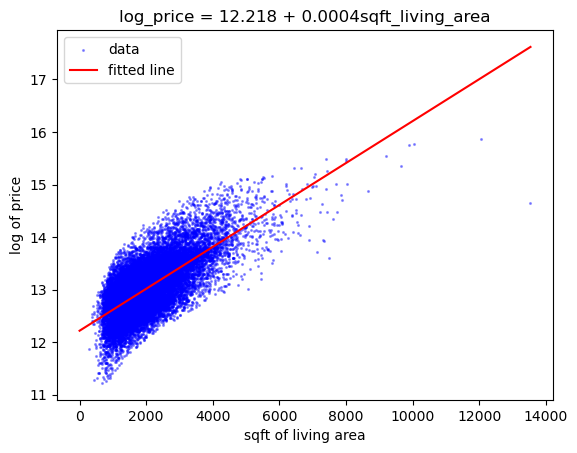

In [205]:
fig, axs = plt.subplots()
axs.scatter(X[["sqft_living"]], y, color = 'blue',  alpha=0.35, s=1.5, label = 'data')

# points for the line
x_domain = np.linspace(0, df["sqft_living"].max())
y_fv = lr_model.predict(x_domain.reshape(-1,1))
axs.plot(x_domain, y_fv, color = 'r', label = "fitted line")
axs.legend()
plt.ylabel("log of price")
plt.xlabel("sqft of living area")
axs.set_title("log_price = {beta0:.3f} + {beta1:.4f}sqft_living_area".format(beta0 = β0, beta1 = β1))

### Multivariate Regression
In the above example, we only had one regressor which was the size of all living areas in square-feet. We can include additional regressors to try and better explain the log of price. We will now consider a multivariate regression where log of price is also a function of the number of bedrooms. That is,

$$
\log(\text{price}) = \beta_0 + \beta_1 \text{sqft_living} + \beta_2 \text{#bedrooms} + \epsilon
$$

In [206]:
# Initialize Univariate Linear Regression Model
lr_model_2 = linear_model.LinearRegression()

# Fit Model
lr_model_2.fit(X[["sqft_living", "bedrooms"]], y)

LinearRegression()

C:\Users\jayca\anaconda3\envs\quntecon2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0.92, 'log_price = 12.324 + 0.0004sqft_living_area + -0.0487#bedrooms')

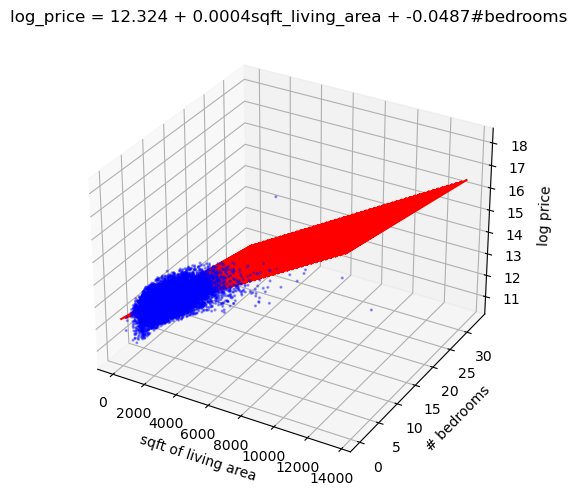

In [207]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[["sqft_living"]], X[["bedrooms"]], y, color = 'blue',  alpha=0.35, s=1.5, label = 'data')
ax.set_xlabel("sqft of living area")
ax.set_ylabel("# bedrooms")
ax.set_zlabel("log price")
fig.tight_layout()

β0 = lr_model_2.intercept_
β1 = lr_model_2.coef_[0]
β2 = lr_model_2.coef_[1]

x_domain = np.linspace(0, df["sqft_living"].max())
y_domain = np.linspace(0, df["bedrooms"].max())
xy_domain = np.array([[x,y] for x in x_domain for y in y_domain])

y_hat=lr_model_2.predict(xy_domain)
ax.plot(xy_domain[:,0], xy_domain[:,1], y_hat, color = 'r', label = "fitted line")
ax.set_title("log_price = {beta0:.3f} + {beta1:.4f}sqft_living_area + {beta2:.4f}#bedrooms".format(beta0 = β0, beta1 = β1, beta2 = β2))

You won't have to be able to make a 3d plot, but keep in mind that when we have two regressors, our predicted values form a plane, not a line. With more than two regressors, predicted values form a hyperplane and visualization becomes very difficult. Note that it is harder to discern the relationship between variables in this 3d plot than it is to discern the relatinship between two variables in a 2d plot. 

### From Data to Linear Model Plot
1. Clean data and prepare it for analysis (in this case we did nothing)
2. Initialize Linear Regression object (or other regression model such as LASSO)
3. use `.fit` method using the appropriate data as inputs
4. Creat scatter plot using data points
5. Grid out domain using `np.linspace`
6. Find predicted values for each point on grid using the `.predict` method
7. Plot line using grid as X and predicted values on those grid points as y

### Interpretability
Economists frequently care more about coefficients than predictions, so it is important to be able to extract the coefficients from the linear model object after it has been fitted. Coefficients give us interpretability. More flexible models (such as neural networks, random forests, etc.) might be able to capture the relationship between variables better, but generally, those methods will be less interpretable than linear regression. 

### Lasso Regression
Lasso Regression generates predictions using $$ y = X\beta $$ but uses a loss function that includes a penalization term:
$$\min_{\beta} ||X\beta - y||_2^2 + \alpha||\beta||_1 $$ 
where $||.||_1$ denotes the L1-norm and $\alpha$ is a regularization parameter. 

Informally speaking, Lasso implciitly selects the regressors from $X$ that are the least "helpful" by assigning coeffcients of 0 to the regressors that do not explain Y well. Typically, researchers who are interested in causal relationships use Lasso to find relevant variables and then run standard Ordinary Least Squares using those variables as the penalization term would actually bias estimates.

Below we can see what regressors lasso chooses when $\alpha = 1$ and what linear regression sets the coefficients to.

In [208]:
lasso_model = linear_model.Lasso()
lasso_model.fit(X, y)
lr_model_all = linear_model.LinearRegression()
lr_model_all.fit(X, y)
lasso_coefs = pd.Series(dict(zip(list(X), lasso_model.coef_)))
lr_coefs = pd.Series(dict(zip(list(X), lr_model_all.coef_)))
coefs = pd.DataFrame(dict(lasso=lasso_coefs, linreg=lr_coefs))
coefs

,lasso,linreg
bedrooms,-0.000000e+00,-1.220820e-02
bathrooms,0.000000e+00,6.912370e-02
sqft_living,3.007615e-04,9.573470e-05
sqft_lot,2.736772e-07,4.711823e-07
floors,0.000000e+00,7.515336e-02
waterfront,0.000000e+00,3.711951e-01
view,0.000000e+00,6.040466e-02
condition,0.000000e+00,6.263658e-02
grade,0.000000e+00,1.589338e-01
sqft_above,-0.000000e+00,4.022408e-05


### Why $\alpha$?  Why use fewer variables?
We use regularization procedures (such as LASSO's penalization the L1 norm of the coefficient vector) to avoid overfitting. Overfitting occurs when our model parameters capture patterns that are specific to the sample the model was fit on, but those patterns don't exist on the population level. More flexible estimators (such as those with more parameters) tend to be more prone to overfitting. See the QuantEcon Lecture Notes for more information.

### Why $\alpha = 1 $?
Setting $\alpha = 1$ is arbitrary. There's some statistical theory for choosing or scaling such parameters under certain settings, but the most common way of choosing these parameters is cross validation, a form of model selection. 

### Cross Validation Steps
1. Randomly split data into training and testing samples
2. Create a grid of values that will serve as potential values for $\alpha$
3. Fit a LASSO model for each value of $\alpha$. Use only the training sample to fit the model.
4. Select the LASSO model that has the lowest MSE on the testing sample.

To see this process in detail, I suggest looking at the QuantEcon chapter on regression. 

## Classification -- Summary
In this chapter, we learned:
- What problems we can use classification for
- How to evaluate classification models

### Classifcation vs. Regression
With regression, we wanted to predict a continuous random variable given a set of regressors or features $X$. 

Classification entails predicting a discrete random variable given a set of features $X$. 

For instance, we could take many pictures of fruit and train a classifier to identify what type of fruit is shown in each picture. In this case, $y$ would be a label such as "Apple" or "Orange" and $X$ would be image data. 

Alternatively, we could categorize people who want health insurance as low risk, medium risk, or high risk based on individual characteristics such as age, previous health issues, etc. 

### Logistic Regression
Logistic regression is related to linear regression, but the goal is binary classification (two possible labels), not regression. Logistic regression attempts to assign a probability to each label given a set of features. Using the recidivism example in the classification chapter, we can write the probability of recidivism as a function of an inmate's decile score and age:
$$
p(\text{recid}) = L\left(\overbrace{\beta_0 + \beta_1\text{decile_score} + \beta_2\text{age}+ \epsilon}^{\text{regression-like}}\right)
$$
where L(.) is the logistic function:
$$
L(x) = \frac{1}{1 + e^{-x}}
$$

Note the range of the logistic function: $L(.) \in (0,1)$. 

In [209]:
# Load Data
data_url = "https://raw.githubusercontent.com/propublica/compas-analysis"
data_url += "/master/compas-scores-two-years.csv"

df = pd.read_csv(data_url)
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [210]:
X = df[["decile_score", "age"]]
y = df["two_year_recid"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

logistic_age_model = linear_model.LogisticRegression(solver="lbfgs")
logistic_age_model.fit(X_train, y_train)

beta_0 = logistic_age_model.intercept_[0]
beta_1, beta_2 = logistic_age_model.coef_[0]

print(f"Fit model: p(recid) = L({beta_0:.4f} + {beta_1:.4f} decile_score + {beta_2:.4f} age)")

Fit model: p(recid) = L(-0.8505 + 0.2470 decile_score + -0.0130 age)


In this model, a label of $1$ means an individual went back to prison. As a result, we can see that an increase in decile_score and a decrease in age both increase the chance of recidivism in this model. 

This is because the logistic function is increasing in its argument. Keep in mind, these coefficients are not naively interpreted because the regression output is being fed through the logistic function.

### Cutoffs
The output of logistic regression is any real-valued number between 0 and 1, so we still are not classifying. In order to turn this into a classification model we feed the probability through a cutoff rule:

$$\text{label} = \left\{\begin{array}{cc} 1 & \text{ if } \hat{p}(1) \geq \gamma \\ 0 & \text{ if } \hat{p}(1) < \gamma  \end{array}\right.
$$

It is common to set $\gamma = .5$


### Model Evaluation
The standard approach to model evaluation is accuracy. This accuracy can be evaluated on in-sample (on the training data) or out of sample (on testing data if some was set aside). The accuracy score is simply:
$$
\text{Accuracy Score} = \frac{\text{Number of Correct Predictions}}{\text{Number of Predictions}}
$$


In [211]:
train_acc = logistic_age_model.score(X_train, y_train)
test_acc = logistic_age_model.score(X_test, y_test)

train_acc, test_acc # underfitting, so we could use more powerfil model or include more variables

(0.6534195933456562, 0.667960088691796)

### Alternatives to Accuracy


In the case where one of the labels is exceedingly rare (this is a severe case of what is called *unbalanced labels*), accuracy score is not a good evaluation metric. For example, if we are trying to classify whether or not someone has a rare, deadly disease based on a list of symptoms, a model could attain a very high accuracy score by always guessing false because most people in the sample do not have that disease. Here are some alternative measures that work well in these situations as described by the chapter:

- Precision: The number of true positives over the number of positive predictions. Precision tells us how often the model was correct when it predicted true.$\dagger$
- Recall: The number of true positives over the number of actual positives. Recall answers the question, “What fraction of the positives did we get correct?”\foot{taken from the chapter}$\dagger$

The chapter gives a concrete example of the tradeoff between these two measures:

"In the rare health condition example, you may prefer a model with high recall (never misses an at-risk patient), even if the precision is a bit low (sometimes you have false positives)."$\dagger$

For more details on this tradeoff, see the QuantEcon Classification Lecture Notes.

## Networks -- Summary
In this chapter, we learned:
- What a network is
- How to represent data as a network
- Relationship between networks and Linear Algebra
- Applying tools to real data

Quotes and code for this section borrow heavily from "Analyzing Economic Networks" notes written by Philip Solimine. 

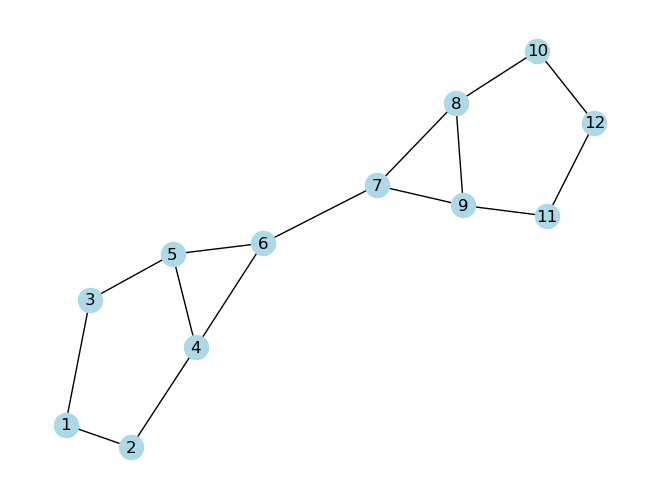

In [212]:
### An example network
network = nx.Graph() #initialize a new graph
network.add_nodes_from(range(1,13)) #add a set of nodes numbered 1 through 12
edgelist = [
            (1,2),
            (1,3),
            (2,4),
            (3,5),
            (4,5),
            (4,6),
            (5,6),
            (6,7),
            (7,8),
            (7,9),
            (8,9),
            (8,10),
            (9,11),
            (10,12),
            (11,12)]
network.add_edges_from(edgelist) #add a set of links or edges to form a network
positions = nx.spring_layout(network,seed=10) #fix the position again
nx.draw(network,positions,node_color="lightblue",with_labels=True)

### What is a Graph?
Graphs tell us how different objects are related to eachother. For instance the graph above tells us that object 4 is connected with objects 2,5, and 6. What "connected" means depends on the setting. 

### Terminology
- Each numbered circle is a **node** or **vertex**. A node might be an individual, a company, or something more abstract. 
- The lines connecting nodes are called **edges** or **link**. A link between individuals might reflect that they are colleagues at the same company or friends on a social network. A link between companies might reflect that those two companies compete in a market or that they are part of the same production stream.  
- A **graph** is a data structure consisting a set of node and a set of edges between those nodes.
- A **path** connecting node i to node j is any set of links that starts at node i and ends at node j. 
- An undirected graph is **connected** if there exists at least one path between any two nodes

### Directed vs. Undirected

- **Directed** networks are networks where the relationship can go one-way
    - On Twitter, you can follow someone even if they do not follow you. 
    - On a dating app, you can swipe right on someone who swipes left on you. 
- **Undirected** networks are networks where the relationshp goes both ways
    - On Facebook, if you are friends with someone, they are friends with you. 
    - On a dating app, if you match with someone, they matched with you. 

In this class, we will focus on undirected networks, but it's good to know about this distinction. 

### Examples of Networks
- Social Networks
    - Nodes: Individuals on the Network
    - Edges: Two individuals are connected if they are friends on that platform
    - Alternative: Two individuals are connected if they have a friend in common on that platform
 
- Transportation Systems
    - Nodes: Bus and Train stops
    - Edges: Two stops are linked if they are on the same route
    - Alternative: Two stops are linked if you can get from one to another using train or a bus
- Supply Chains
    - Nodes: Companies
    - Edges: Two companies are linked if one of them supplies goods to the other


### Network Measures
The **degree of a node** is number of connection that node has. In our toy example above, the degree of node 1 is 2 because it is linked to nodes 2 and 3.

Nodes that have relatively high degrees are called **hubs** (much like hub airports are connected to a relatively large number of airports).

The **degree of a network** is the total number of connections. Note that this will be the sum of node degreees divided by 2.

If there are $n$ nodes in a network, the largest possible degree of the network is $\frac{n(n-1)}{2}$. This maximum is attained when every node is connected each other node. 

The **density of a network** is the degree of the network divided by its theoretical maximum. That is, 
$$
\text{density} = \frac{2 * \text{degree of network}}{n(n-1)}
$$
where $n$ is the number of nodes. 

A network is **dense** when its density is close to 1 and **sparse** when its density is close to 0. 

### Edges as a Matrix
When we wrote our edges to draw the graph above, we specified which nodes were connected by providing a list of tuples. Instead, we can represent edges connecting $n$ nodes as an **adjacency matrix**.

In [213]:
edge_mat = nx.adjacency_matrix(network).todense()
edge_mat

C:\Users\jayca\AppData\Local\Temp\ipykernel_16108\820639453.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  edge_mat = nx.adjacency_matrix(network).todense()


matrix([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]], dtype=int32)

### Finding Number of Paths of a Given Length
We can use the adjacency matrix to count how many paths of a given length there are. Using our previous network, we will calculate the number of paths of length 4 that takes us from node 1 to node 6.

In [214]:
def num_paths(adj_mat, i, j, length):
    adj_mat = np.linalg.matrix_power(adj_mat, length)
    return adj_mat[i,j]

In [215]:
num_paths(edge_mat, 0, 5, 4)

2

Looking below at our network, there are two potential paths that gets us from node 1 (index 0) to node 6 (index 5).
1. 1-2 2-4 4-5 5-6
2. 1-3 3-5 5-4 4-6

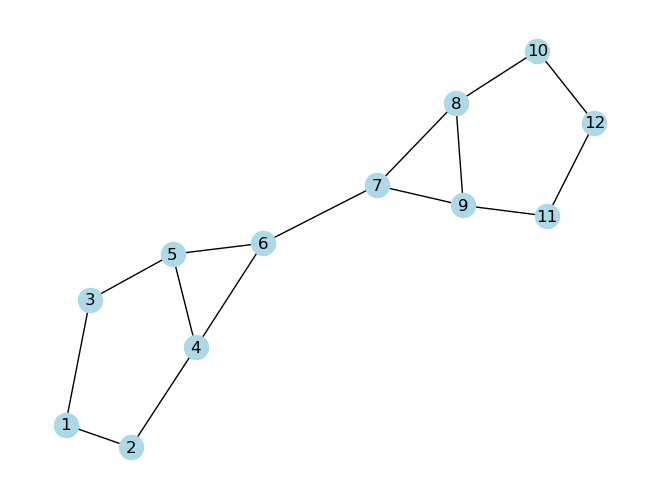

In [216]:
nx.draw(network,positions,node_color="lightblue",with_labels=True)

## Eigenvector Centrality
See Phil's notes for a discussion of this. What I want to illustrate is how we can actually get the eigenvector centraility using numpy. Using the networkx package, we can get the centraility measure of each node like this:

In [217]:
nx.eigenvector_centrality(network)

{1: 0.1334802252395964,
 2: 0.17976424193435497,
 3: 0.17976424193435497,
 4: 0.3507167199666811,
 5: 0.3507167199666811,
 6: 0.4141838103851299,
 7: 0.4141838103851299,
 8: 0.3507167199666811,
 9: 0.3507167199666811,
 10: 0.17976424193435497,
 11: 0.17976424193435497,
 12: 0.13348022523959638}

Alternatively, we can get this centraility measure by finding the eigenvector corresponding to the eigenvalue of the adjacency matrix with the largest magnitude. 

In [230]:
index = np.abs(np.linalg.eig(edge_mat)[0]).argmax() # largest eignevalue index
np.linalg.eig(edge_mat)[1][:,index] #corresponding eigenvector

matrix([[0.13347739],
        [0.17976236],
        [0.17976236],
        [0.35071705],
        [0.35071705],
        [0.4141858 ],
        [0.4141858 ],
        [0.35071705],
        [0.35071705],
        [0.17976236],
        [0.17976236],
        [0.13347739]])

### Laplacian Matrix
Let $D_i$ be the degree of node $i$ in a given graph, $G$. Define an $nxn$ diagonal matrix
$$
D := \left[ 
\begin{array}{cccc}
D_1 & 0 & ... & 0\\
0  & D_2 & ... & 0 \\
0  & 0 & ...&D_n
\end{array}
\right]
$$
Let $A$ be the adjacency matrix of $G$. Then the laplacian matrix of $G$ is defined as
$$
L := D - A
$$
In words, the laplacian matrix's diagonal elements are equal to the degree of the corresponding node. It's off-diagonal elements are the negative of the corresponidng elements in the adjancency matrix

In [219]:
L_mat = nx.laplacian_matrix(network).todense()
L_mat

<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


matrix([[ 2, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [-1,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
        [-1,  0,  2,  0, -1,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -1,  0,  3, -1, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0, -1, -1,  3, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1, -1,  3, -1,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1,  3, -1, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, -1,  3, -1, -1,  0,  0],
        [ 0,  0,  0,  0,  0,  0, -1, -1,  3,  0, -1,  0],
        [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  2,  0, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  2, -1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  2]], dtype=int32)